In [1]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install tensorflow tensorflow-datasets librosa soundfile


In [ ]:
# @title
# 최초 1회만 실행 압축해제
import zipfile

# Define paths
data1_zip_path = '/content/drive/My Drive/Data/archive.zip'
data2_zip_path ='/content/drive/My Drive/Data/Audio_Song_Actors_01-24.zip'

extract_path1 = '/content/drive/My Drive/Data/First'
extract_path2 = '/content/drive/My Drive/Data/First'

# Extract the first dataset
with zipfile.ZipFile(data1_zip_path, 'r') as zip_ref:
   zip_ref.extractall(extract_path1)

# Extract the second dataset
with zipfile.ZipFile(data2_zip_path, 'r') as zip_ref:
   zip_ref.extractall(extract_path2)

KeyboardInterrupt: 

In [3]:
# Looking at file name and extract information about the Class Label

import glob

# Google Drive 내의 data 폴더에 있는 .wav 파일을 불러오는 코드
filenames = glob.glob("/content/drive/MyDrive/Data/First/Actor_*/**/*.wav", recursive=True)

# 파일 리스트의 길이를 확인합니다.
if len(filenames) == 0:
    print("파일이 로드되지 않았습니다. 경로를 확인하세요.")
else:
    print(f"발견된 파일 개수: {len(filenames)}")
    print(filenames[:5])  # 첫 5개의 파일만 출력


발견된 파일 개수: 2452
['/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav']


    Audio-only files of all actors (01-24) are available as two separate zip files (~200 MB each):

    Speech file (Audio_Speech_Actors_01-24.zip, 215 MB) contains 1440 files: 60 trials per actor x 24 actors = 1440.
    Song file (Audio_Song_Actors_01-24.zip, 198 MB) contains 1012 files: 44 trials per actor x 23 actors = 1012.
    
    
    Each of the RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

    Filename identifiers
        Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
        Vocal channel (01 = speech, 02 = song).
        Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
        Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
        Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
        Repetition (01 = 1st repetition, 02 = 2nd repetition).
        Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

    Filename example: 02-01-06-01-02-01-12.mp4
        Video-only (02)
        Speech (01)
        Fearful (06)
        Normal intensity (01)
        Statement "dogs" (02)
        1st Repetition (01)
        12th Actor (12)
        Female, as the actor ID number is even.

In [4]:
from collections import Counter # collections에서 Counter를 import 합니다.

emotions_id={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

label_counts = dict(Counter([x.split('/')[-1].split('-')[2] for x in filenames]))
label_counts = {emotions_id[k]:v for k,v in label_counts.items()}
label_counts

{'neutral': 188,
 'calm': 376,
 'happy': 376,
 'sad': 376,
 'angry': 376,
 'fearful': 376,
 'disgust': 192,
 'surprised': 192}

In [10]:
# Lets visualise how a single sound File looks like and its features
fid = filenames[200]
print(fid)

/content/drive/MyDrive/Data/First/Actor_02/03-02-06-01-01-01-02.wav


In [5]:

!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.4 MB/s eta 0:00:00


In [6]:
!pip install librosa

In [7]:
import os
import glob
import librosa
import soundfile as sf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [11]:
import soundfile as sf # Make sure the soundfile module is imported as sf

sf = sf.SoundFile(fid) # Use sf to call SoundFile from the soundfile module
data = sf.read(dtype="float32")
sample_rate = sf.samplerate

In [18]:
print(f"First 5 filenames: {filenames[:5]}")

First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav']


In [17]:
sf

SoundFile('/content/drive/MyDrive/Data/First/Actor_02/03-02-06-01-01-01-02.wav', mode='r', samplerate=48000, channels=1, format='WAV', subtype='PCM_16', endian='FILE')

In [16]:
data[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
duration = data.shape[0]/sample_rate
duration

4.7380625

In [19]:
sample_rate

48000

In [13]:
import IPython.display as ipd
ipd.Audio(fid)

### EXPLORATION

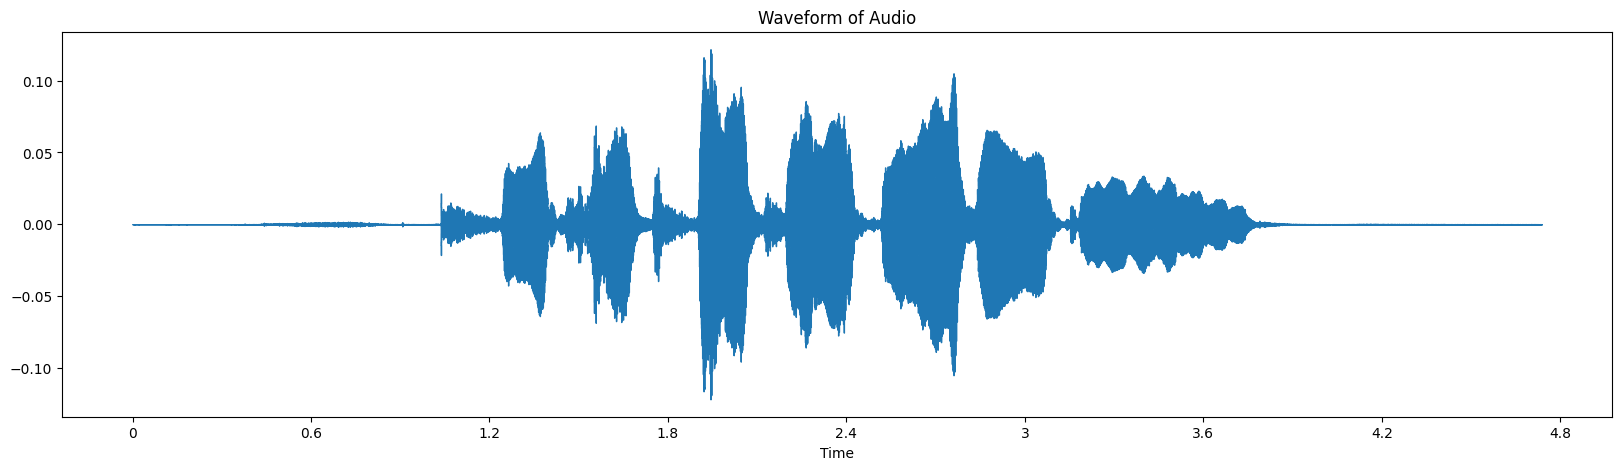

In [14]:
import matplotlib.pyplot as plt

# Plot the waveform using waveshow
plt.figure(figsize=(20, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform of Audio')
plt.show()

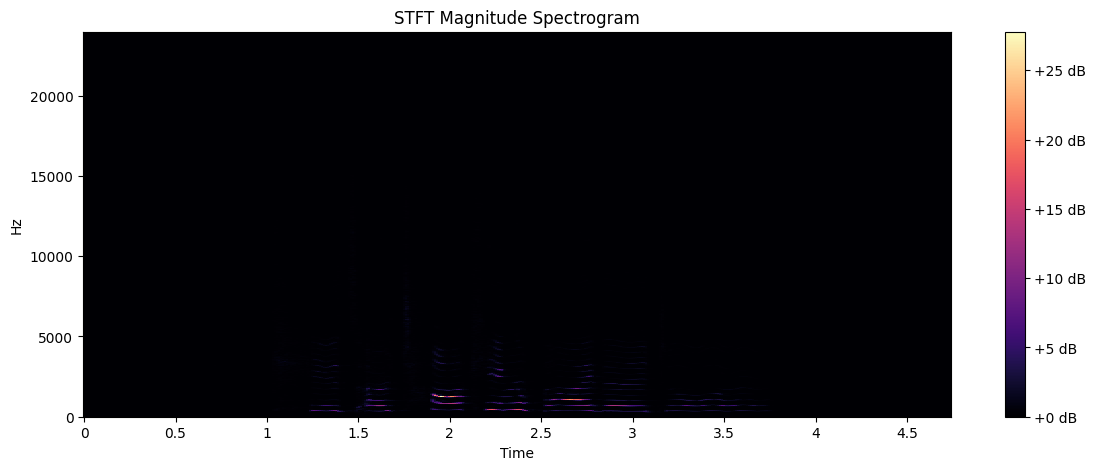

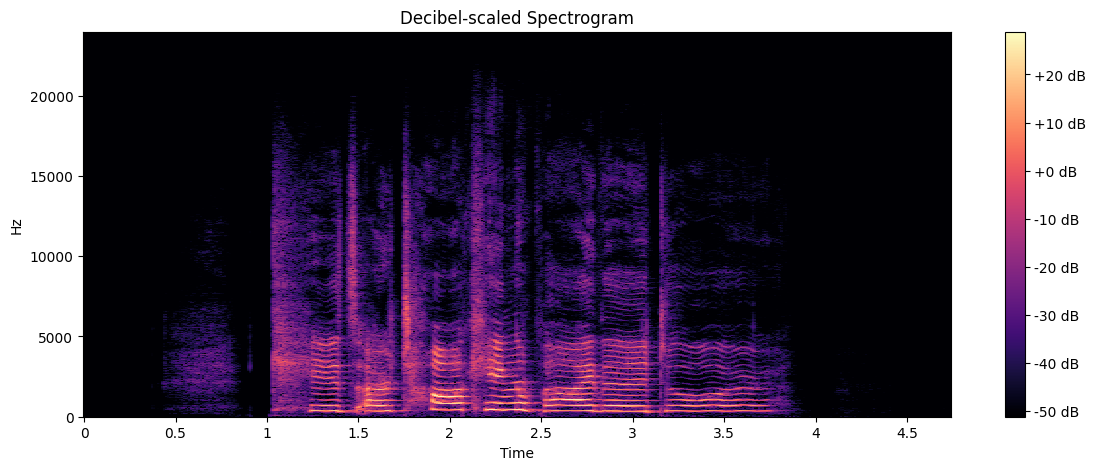

In [20]:
# Computing the Short-Time Fourier Transform (STFT)
x_stft = librosa.stft(data)

# Converting the amplitude to decibels (log scale)
x_db = librosa.amplitude_to_db(abs(x_stft))

# Plotting the raw STFT spectrogram (not usually done this way, for comparison)
plt.figure(figsize=(14, 5))
librosa.display.specshow(abs(x_stft), sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('STFT Magnitude Spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.show()

# Plotting the decibel-scaled spectrogram (this is the more common visualization)
plt.figure(figsize=(14, 5))
librosa.display.specshow(x_db, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('Decibel-scaled Spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.show()


Shape of Mel Spectrogram: (128, 445)


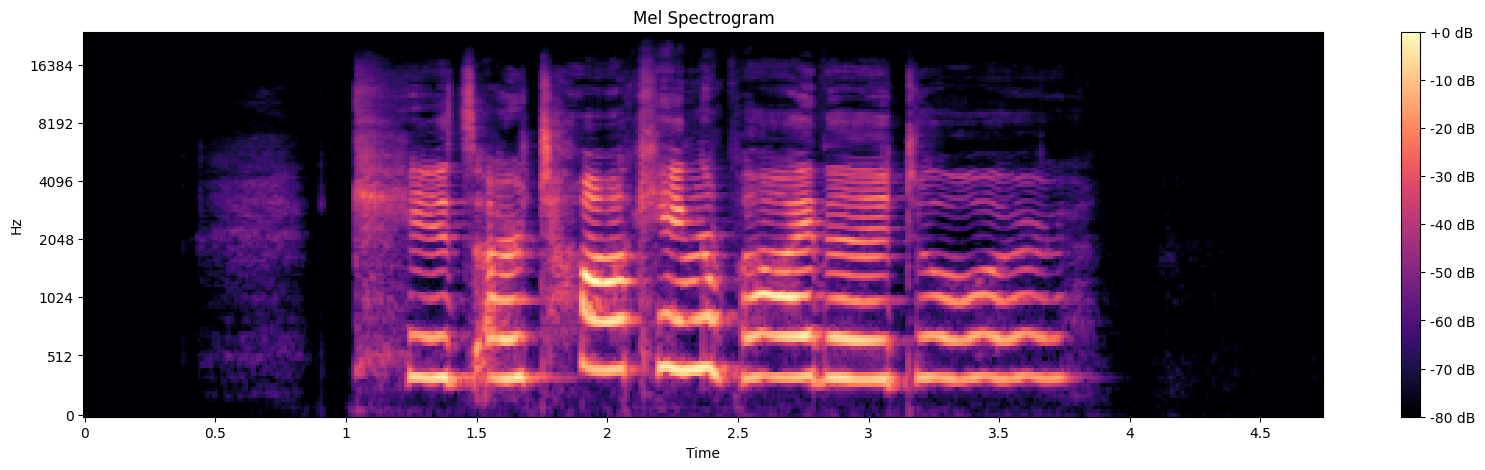

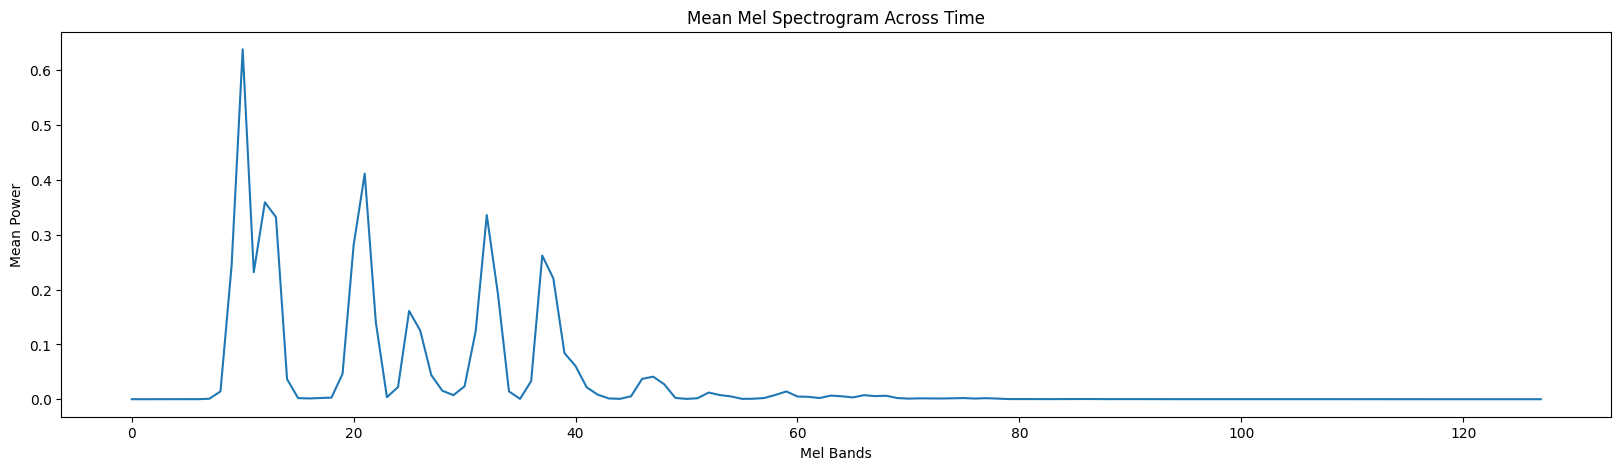

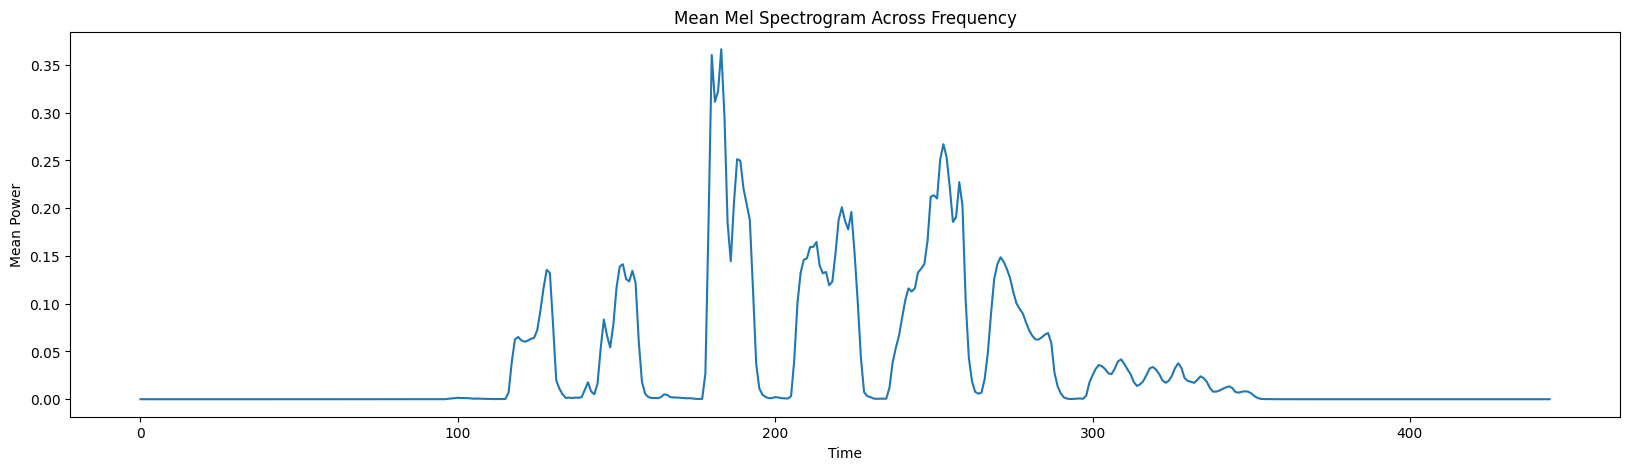

In [21]:
# Computing a Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=data, sr=sample_rate)
print('Shape of Mel Spectrogram:', mel_spec.shape)

plt.figure(figsize=(20, 5))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max),
                         sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

# Ploting the mean of the Mel spectrogram across time (mean per frequency band)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mel_spec, axis=1))
plt.title('Mean Mel Spectrogram Across Time')
plt.xlabel('Mel Bands')
plt.ylabel('Mean Power')
plt.show()

# Ploting the mean of the Mel spectrogram across frequency (mean per time frame)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mel_spec, axis=0))
plt.title('Mean Mel Spectrogram Across Frequency')
plt.xlabel('Time')
plt.ylabel('Mean Power')
plt.show()


In [22]:
# # mel_scpetrogram
# mel_spec = librosa.feature.melspectrogram(data, sr=sample_rate )
# print('shape:', mel_spec.shape)
# plt.figure(figsize=(20, 5))
# librosa.display.specshow(mel_spec, sr=sample_rate, x_axis='time')

# plt.figure(figsize=(20, 5))
# plt.plot(np.mean(mel_spec, axis=0))

# plt.figure(figsize=(20, 5))
# plt.plot(np.mean(mel_spec, axis=1))

In [23]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav']


Shape of MFCCs: (13, 445)


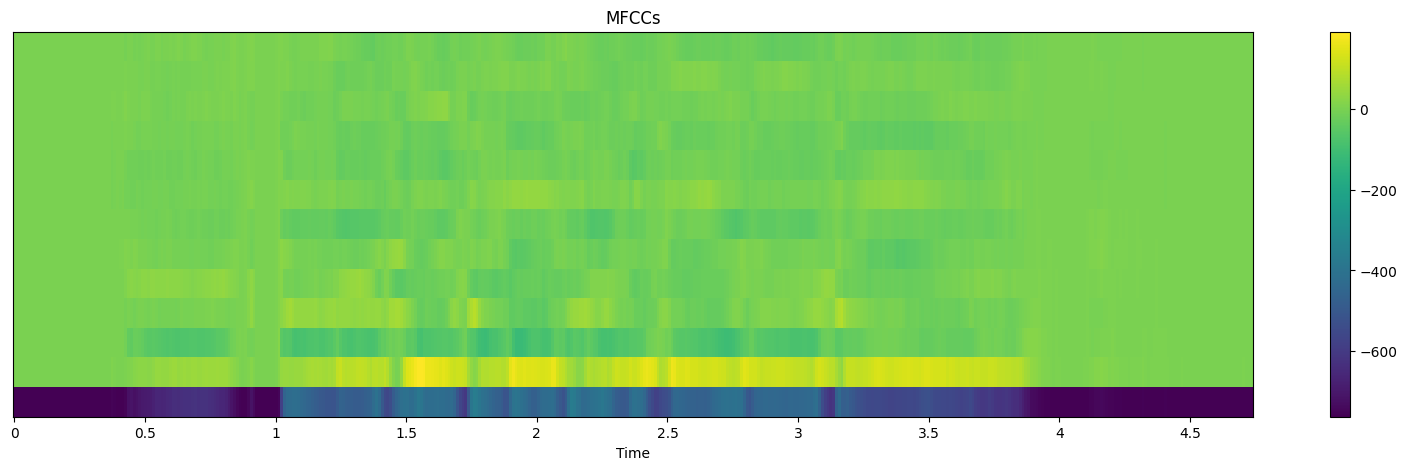

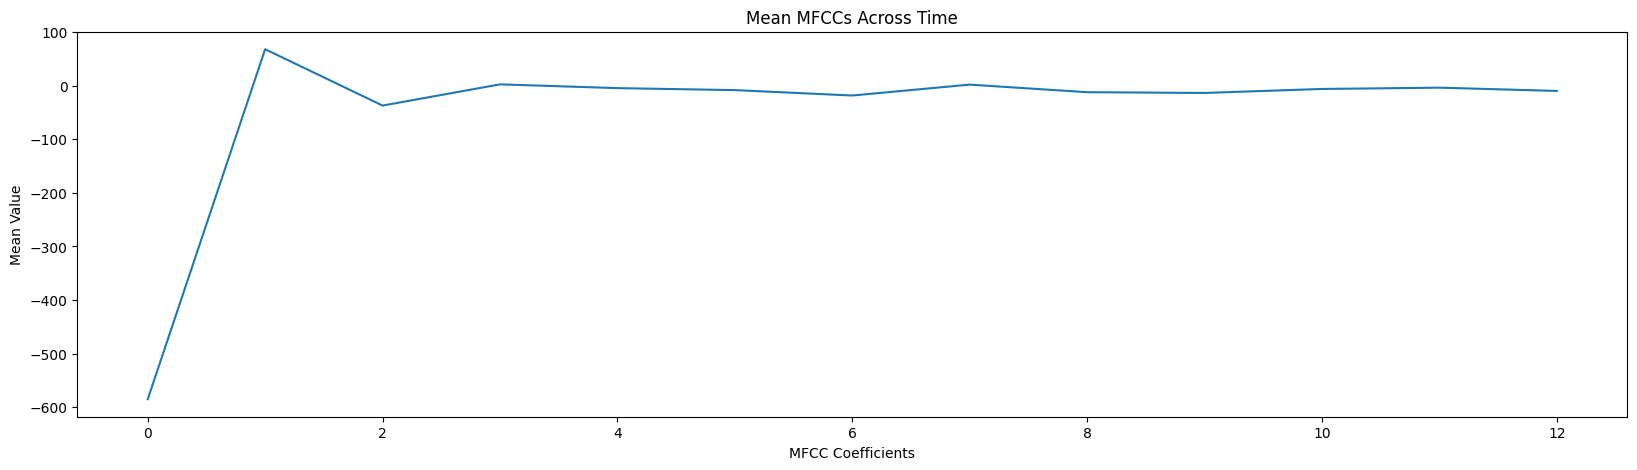

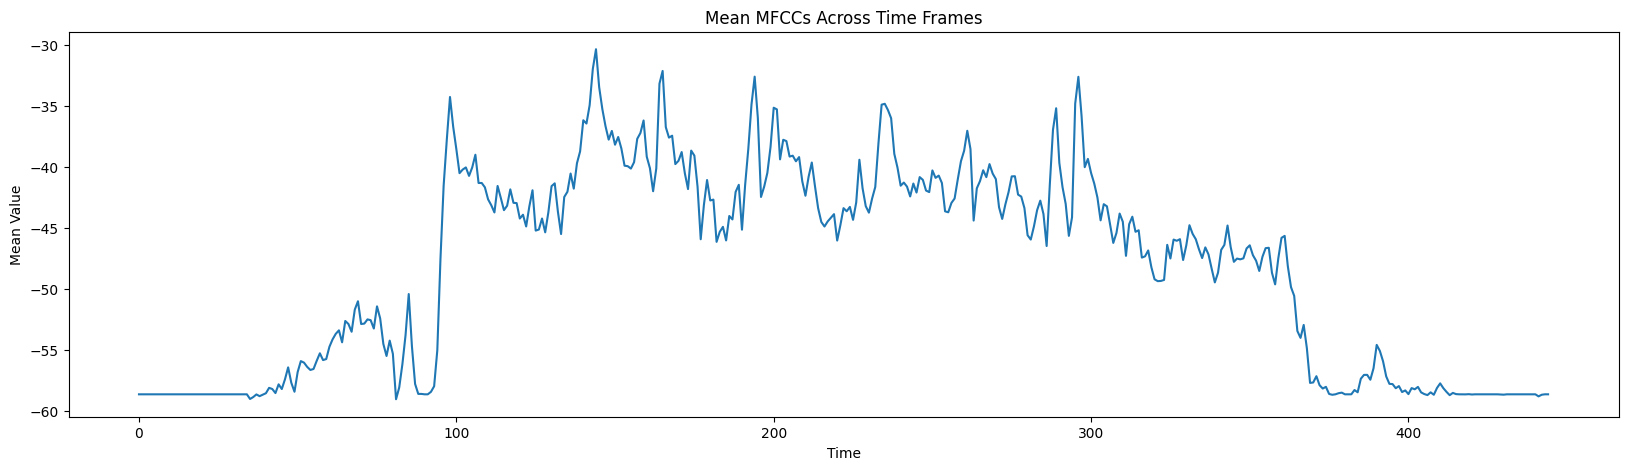

In [25]:
# MFCCs (Mel-Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
print('Shape of MFCCs:', mfccs.shape)

# Plot the MFCCs as a spectrogram
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('MFCCs')
plt.show()

# Plot the mean of the MFCCs across time (mean per coefficient)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mfccs, axis=1))
plt.title('Mean MFCCs Across Time')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.show()

# Plot the mean of the MFCCs across coefficients (mean per time frame)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mfccs, axis=0))
plt.title('Mean MFCCs Across Time Frames')
plt.xlabel('Time')
plt.ylabel('Mean Value')
plt.show()

### FEATURE EXTRACTION

In [26]:
import librosa
import soundfile as sf
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [27]:
file = filenames[0]  # 첫 번째 파일
try:
    with sf.SoundFile(file) as sound_file:
        X = sound_file.read(dtype="float32")
        print(f"데이터 크기: {X.shape}")
except Exception as e:
    print(f"오류 발생: {e}")


데이터 크기: (158558,)


In [28]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav']


In [29]:
# 증강 함수 정의
def add_white_noise(data, noise_factor=0.005):
    """백색 잡음을 신호에 추가"""
    noise = np.random.randn(len(data))  # noise는 1D 배열로 생성되어야 함
    augmented_data = data + noise_factor * noise  # 차원이 동일한 경우에만 연산
    return augmented_data

def pitch_shift(data, sr, n_steps=2):
    """신호의 피치를 n_steps만큼 시프트"""
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)


In [30]:
import numpy as np
import soundfile as sf
import librosa

def extract_feature(file_name, mfcc=True, mel=True, augment=True, noise_factor=0.005, n_steps=2):
    try:
        with sf.SoundFile(file_name) as sound_file:
            X = sound_file.read(dtype="float32")
            sample_rate = sound_file.samplerate

            # 증강 기법 적용 (선택적으로 사용)
            if augment:
                X = add_white_noise(X, noise_factor=noise_factor)  # 백색 잡음 추가
                X = pitch_shift(X, sr=sample_rate, n_steps=n_steps)  # 피치 시프트 적용

            result = np.array([])

            # 최소 샘플 길이 확인 (너무 짧은 신호는 건너뜀)
            if len(X) < 1000 or np.sum(np.abs(X)) < 1e-3:
                print(f"신호가 너무 짧거나 무음입니다: {file_name}")
                return None

            n_fft = max(512, min(2048, len(X) // 2))

            if X.ndim == 2:
                X = np.mean(X, axis=1)

            # MFCC 추출 및 평균 계산
            if mfcc:
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
                result = np.hstack((result, mfccs))

            # Mel-Spectrogram 추출 및 평균 계산
            if mel:
                mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate, n_fft=n_fft).T, axis=0)
                result = np.hstack((result, mel_spectrogram))

            return result

    except Exception as e:
        print(f"특징 추출 오류: {e} (파일: {file_name})")
        return None


In [31]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav']


In [32]:
from collections import Counter

In [33]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
reverse_emotions = {v:k for k,v in emotions.items()}

# observed_emotions=['calm', 'happy', 'fearful', 'disgust'] // 82
observed_emotions=list(emotions.values())


id_counts = dict(Counter([x.split('/')[-1].split('-')[2] for x in filenames]))
label_counts = {emotions[k]:v for k,v in id_counts.items()}

In [34]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav']


In [35]:
#only for 디버깅(디버깅 할 때만 사용하세요. )
'''
from tqdm import tqdm
import numpy as np

def load_data(augment=True, noise_factor=0.005, n_steps=2, padding_length=200, debug_input_shape=True):
    x = []  # Initialize x as a list
    y = []  # Initialize y as a list
    error_log = []  # 오류 로그 저장

    # 초기 5개의 데이터만 확인할 수 있도록 카운터 변수 설정
    input_shapes_checked = 0  # 디버깅을 위한 카운터

    # tqdm 인스턴스를 한 번만 생성하면서 leave=True와 dynamic_ncols=True 추가
    pbar = tqdm(total=min(5, len(filenames)) * 2, desc="Processing initial files", unit="file", leave=True, position=0)

    for i, file in enumerate(filenames):
        try:
            if input_shapes_checked >= 5:
                break  # 처음 5개 파일에 대해서만 디버깅

            file_name = os.path.basename(file)
            emotion = emotions[file_name.split("-")[2]]
            if emotion not in observed_emotions:
                continue

            # 원본 데이터 처리
            feature = extract_feature(file, augment=False)
            if feature is not None:
                # 반복 패딩 적용
                if len(feature) < padding_length:
                    feature = np.pad(feature, (0, padding_length - len(feature)), mode='edge')
                elif len(feature) > padding_length:
                    feature = feature[:padding_length]
                x.append(feature)
                y.append(emotion)

                # input_shape 확인
                if debug_input_shape and input_shapes_checked < 5:
                    print(f"[DEBUG] Shape of feature {input_shapes_checked + 1}: {feature.shape}")
                    input_shapes_checked += 1

            # 증강 데이터 처리
            if augment:
                feature = extract_feature(file, augment=True, noise_factor=noise_factor, n_steps=n_steps)
                if feature is not None:
                    if len(feature) < padding_length:
                        feature = np.pad(feature, (0, padding_length - len(feature)), mode='edge')
                    elif len(feature) > padding_length:
                        feature = feature[:padding_length]
                    x.append(feature)
                    y.append(emotion)

                    # input_shape 확인
                    if debug_input_shape and input_shapes_checked < 5:
                        print(f"[DEBUG] Shape of augmented feature {input_shapes_checked + 1}: {feature.shape}")
                        input_shapes_checked += 1

            pbar.update(2 if augment else 1)

        except Exception as e:
            error_log.append(f"특징 추출 오류 for file {file_name}: {e}")

    pbar.close()

    # 오류 로그 출력
    for error in error_log:
        print(error)

    print("Finished processing first 5 files.")

    # 1D 특징 벡터를 2D로 변환
    x = np.array(x)
    y = np.array(y)

    # 1D 벡터를 2D로 재구성
    if x.ndim == 2 and x.shape[0] > 0:  # (samples, feature_length)일 때만 reshape 수행

        # 전체 길이를 기준으로 time_steps와 freq_bins을 자동으로 계산
        total_length = x.shape[1]

        # time_steps를 최소 3 이상으로 설정하여 CNN 커널과 호환되도록 조정
        time_steps = max(3, int(np.sqrt(total_length)))
        while total_length % time_steps != 0:
            time_steps -= 1

        freq_bins = total_length // time_steps
        x = x.reshape(-1, time_steps, freq_bins, 1)  # CNN 입력을 위한 4D 형식

        # 최종 input_shape 확인
        print(f"Final input shape for model after first 5 samples: {x.shape[1:]}")

    return x, y
'''

'\nfrom tqdm import tqdm\nimport numpy as np\n\ndef load_data(augment=True, noise_factor=0.005, n_steps=2, padding_length=200, debug_input_shape=True):\n    x = []  # Initialize x as a list\n    y = []  # Initialize y as a list\n    error_log = []  # 오류 로그 저장\n\n    # 초기 5개의 데이터만 확인할 수 있도록 카운터 변수 설정\n    input_shapes_checked = 0  # 디버깅을 위한 카운터\n\n    # tqdm 인스턴스를 한 번만 생성하면서 leave=True와 dynamic_ncols=True 추가\n    pbar = tqdm(total=min(5, len(filenames)) * 2, desc="Processing initial files", unit="file", leave=True, position=0)\n\n    for i, file in enumerate(filenames):\n        try:\n            if input_shapes_checked >= 5:\n                break  # 처음 5개 파일에 대해서만 디버깅\n\n            file_name = os.path.basename(file)\n            emotion = emotions[file_name.split("-")[2]]\n            if emotion not in observed_emotions:\n                continue\n\n            # 원본 데이터 처리\n            feature = extract_feature(file, augment=False)\n            if feature is not None:\n              

In [36]:
from tqdm import tqdm
import numpy as np

def load_data(augment=True, noise_factor=0.005, n_steps=2, padding_length=200):
    x = []  # Initialize x as a list
    y = []  # Initialize y as a list
    error_log = []  # 오류 로그 저장

    # 증강 파일 수와 원본 파일 수 초기화
    original_count = 0
    augmented_count = 0

    # tqdm 인스턴스를 한 번만 생성하면서 leave=True와 dynamic_ncols=True 추가
    pbar = tqdm(total=len(filenames) * 2, desc="Processing files", unit="file", leave=True, position=0)

    for file in filenames:
        try:
            file_name = os.path.basename(file)
            emotion = emotions[file_name.split("-")[2]]
            if emotion not in observed_emotions:
                continue

            # 원본 데이터 처리
            feature = extract_feature(file, augment=False)
            if feature is not None:
                # 반복 패딩 적용 (feature 길이가 padding_length보다 작으면 마지막 값을 반복)
                if len(feature) < padding_length:
                    feature = np.pad(feature, (0, padding_length - len(feature)), mode='edge')
                elif len(feature) > padding_length:
                    feature = feature[:padding_length]  # 길이가 너무 길면 잘라내기
                x.append(feature)
                y.append(emotion)
                original_count += 1

            # 진행률 표시줄 업데이트
            pbar.set_postfix({"original": original_count, "augmented": augmented_count}, refresh=False)
            pbar.update(1)

            # 증강 데이터 처리
            if augment:
                feature = extract_feature(file, augment=True, noise_factor=noise_factor, n_steps=n_steps)
                if feature is not None:
                    if len(feature) < padding_length:
                        feature = np.pad(feature, (0, padding_length - len(feature)), mode='edge')
                    elif len(feature) > padding_length:
                        feature = feature[:padding_length]
                    x.append(feature)
                    y.append(emotion)
                    augmented_count += 1

                # 진행률 표시줄 업데이트
                pbar.set_postfix({"original": original_count, "augmented": augmented_count}, refresh=False)
                pbar.update(1)

        except Exception as e:
            error_log.append(f"특징 추출 오류: {e} (파일: {file})")

    pbar.close()

    # 오류 로그 출력
    for error in error_log:
        print(error)

    print("Finished processing files.")

    # 1D 특징 벡터를 2D로 변환
    x = np.array(x)
    y = np.array(y)

    # 1D 벡터를 2D로 재구성
    if x.ndim == 2:  # (samples, feature_length)일 때만 reshape 수행

        # 전체 길이를 기준으로 time_steps와 freq_bins을 자동으로 계산
        total_length = x.shape[1]

        # time_steps를 최소 3 이상으로 설정하여 CNN 커널과 호환되도록 조정
        time_steps = max(3, int(np.sqrt(total_length)))  # 최소 3 이상의 정사각형에 가까운 time_steps 설정
        while total_length % time_steps != 0:
            time_steps -= 1

        freq_bins = total_length // time_steps  # 주파수 축의 크기
        x = x.reshape(-1, time_steps, freq_bins, 1)  # CNN 입력을 위한 4D 형식

    print(f"Final Feature array shape: {x.shape}")
    print(f"Final Number of labels: {len(y)}")

    if x.size == 0 or y.size == 0:
        print("Error: load_data() returned empty arrays.")

    return x, y


In [37]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav']


In [38]:
!pip install tensorflow
!pip install keras
!pip install tqdm

### KERAS MODEL

In [39]:
#Keras-tf model MLP with Dense
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import os
from tqdm import tqdm
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=0.001)

In [40]:
reverse_emotions

{'neutral': '01',
 'calm': '02',
 'happy': '03',
 'sad': '04',
 'angry': '05',
 'fearful': '06',
 'disgust': '07',
 'surprised': '08'}

In [41]:
!pip install resampy


In [42]:
data_x, data_y = load_data()

# Check if data_x and data_y are empty
if data_x.size == 0 or data_y.size == 0:
    print("Error: load_data() returned empty arrays.")
    # Investigate why load_data() is not returning any data
    # ...
else:
    print("Feature array shape:", data_x.shape)
    print("Number of labels:", len(data_y))
    print("data_x:", data_x)
    print("data_y:", data_y)

    x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

    # ... rest of the code ...

Processing files:   0%|          | 11/4904 [00:14<58:16,  1.40file/s, original=6, augmented=5]

특징 추출 오류: operands could not be broadcast together with shapes (172972,2) (172972,)  (파일: /content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-02-01.wav)


Processing files:   2%|▏         | 111/4904 [01:00<40:35,  1.97file/s, original=56, augmented=54]

특징 추출 오류: operands could not be broadcast together with shapes (156956,2) (156956,)  (파일: /content/drive/MyDrive/Data/First/Actor_01/03-01-08-01-02-02-01.wav)


Processing files:  17%|█▋        | 847/4904 [06:32<35:13,  1.92file/s, original=424, augmented=421]

특징 추출 오류: operands could not be broadcast together with shapes (203403,2) (203403,)  (파일: /content/drive/MyDrive/Data/First/Actor_05/03-01-02-01-02-02-05.wav)


Processing files:  79%|███████▉  | 3893/4904 [29:52<08:41,  1.94file/s, original=1947, augmented=1943]

특징 추출 오류: operands could not be broadcast together with shapes (166566,2) (166566,)  (파일: /content/drive/MyDrive/Data/First/Actor_20/03-01-03-01-02-01-20.wav)


Processing files:  80%|████████  | 3939/4904 [30:13<09:12,  1.75file/s, original=1970, augmented=1965]

특징 추출 오류: operands could not be broadcast together with shapes (209809,2) (209809,)  (파일: /content/drive/MyDrive/Data/First/Actor_20/03-01-06-01-01-02-20.wav)


Processing files:  98%|█████████▊| 4817/4904 [36:57<00:42,  2.07file/s, original=2409, augmented=2403]

특징 추출 오류: operands could not be broadcast together with shapes (229029,2) (229029,)  (파일: /content/drive/MyDrive/Data/First/Actor_24/03-02-01-01-01-01-24.wav)


Processing files: 100%|██████████| 4904/4904 [38:58<00:00,  2.10file/s, original=2452, augmented=2446]


Finished processing files.
Final Feature array shape: (4898, 10, 20, 1)
Final Number of labels: 4898
Feature array shape: (4898, 10, 20, 1)
Number of labels: 4898
data_x: [[[[-7.26217224e+02]
   [ 6.85414200e+01]
   [ 3.29339767e+00]
   ...
   [ 2.54240870e-01]
   [ 2.67537785e+00]
   [-1.76116586e+00]]

  [[-1.88647437e+00]
   [-9.75619912e-01]
   [-3.79437059e-01]
   ...
   [-1.20721745e+00]
   [-1.59498167e+00]
   [-1.43648756e+00]]

  [[ 1.70184157e-05]
   [ 1.43234653e-03]
   [ 1.66232847e-02]
   ...
   [ 1.37796523e-02]
   [ 2.77529773e-03]
   [ 9.25028231e-03]]

  ...

  [[ 3.67811253e-06]
   [ 5.99873147e-06]
   [ 6.09255176e-06]
   ...
   [ 5.42804628e-07]
   [ 3.79851201e-07]
   [ 2.65911297e-07]]

  [[ 1.35898077e-07]
   [ 6.42136655e-08]
   [ 4.12477661e-08]
   ...
   [ 5.36105249e-09]
   [ 5.36105249e-09]
   [ 5.36105249e-09]]

  [[ 5.36105249e-09]
   [ 5.36105249e-09]
   [ 5.36105249e-09]
   ...
   [ 5.36105249e-09]
   [ 5.36105249e-09]
   [ 5.36105249e-09]]]


 [[[-3.924

In [43]:
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

def visualize_data(original_data, augmented_data, sr):
    plt.figure(figsize=(12, 6))

    # 원본 데이터 시각화
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(original_data, sr=sr)
    plt.title("Original Audio")

    # 증강된 데이터 시각화
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(augmented_data, sr=sr)
    plt.title("Augmented Audio")

    plt.tight_layout()
    plt.show()

def compare_data_statistics(original_data, augmented_data):
    print("Original Data Statistics")
    print(f"Mean: {original_data.mean()}, Std: {original_data.std()}")

    print("\nAugmented Data Statistics")
    print(f"Mean: {augmented_data.mean()}, Std: {augmented_data.std()}")

def play_audio(data, sr):
    return ipd.Audio(data, rate=sr)


def debug_augmentation(file_name, noise_factor=0.005, n_steps=2):
    with sf.SoundFile(file_name) as sound_file:
        original_data = sound_file.read(dtype="float32")
        sr = sound_file.samplerate

    # 백색 잡음 추가 및 피치 시프트 적용
    augmented_data = add_white_noise(original_data, noise_factor=noise_factor)
    augmented_data = pitch_shift(augmented_data, sr=sr, n_steps=n_steps)

    # 데이터 시각화
    visualize_data(original_data, augmented_data, sr)

    # 데이터 통계적 비교
    compare_data_statistics(original_data, augmented_data)

    # 원본 및 증강된 오디오 재생
    print("Original Audio:")
    play_audio(original_data, sr)

    print("\nAugmented Audio:")
    play_audio(augmented_data, sr)


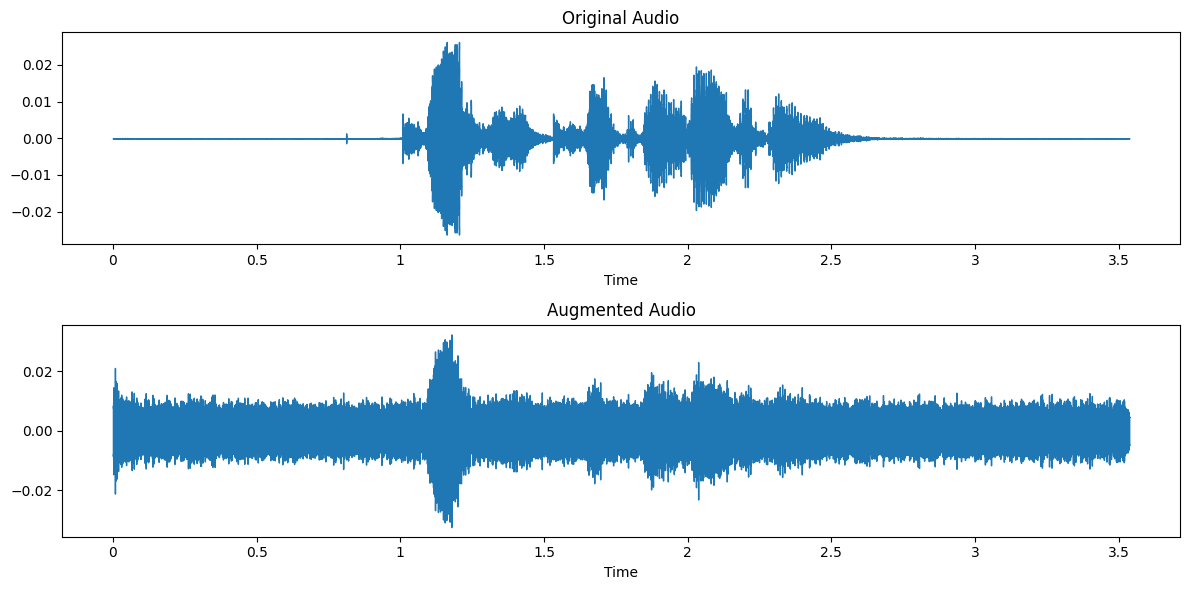

Original Data Statistics
Mean: 8.10894789537997e-07, Std: 0.002956344746053219

Augmented Data Statistics
Mean: 3.3126942141659092e-06, Std: 0.0038455821136347107
Original Audio:

Augmented Audio:


In [44]:
# 파일 경로 지정 (파일 하나를 선택해서 지정합니다)
file_path = '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav'

# 해당 파일에 증강을 적용하고 결과를 확인
debug_augmentation(file_name=file_path, noise_factor=0.005, n_steps=2)


In [ ]:
'''
# 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical([int(reverse_emotions[x])-1 for x in y_train])
y_test = to_categorical([int(reverse_emotions[x])-1 for x in y_test])

# CNN-LSTM 입력에 맞는 4D 형태로 변환 (필요한 경우)
if x_train.ndim == 3:  # (samples, time_steps, freq_bins)일 경우
    x_train = np.expand_dims(x_train, axis=-1)  # 4D 배열로 확장
    x_test = np.expand_dims(x_test, axis=-1)

# Configuration options
num_classes = len(observed_emotions)

# CNN-LSTM 입력에 맞는 input_shape 설정
input_shape = x_train.shape[1:]  # (time_steps, freq_bins, 1) 형태가 되어야 함

print("input_shape:", input_shape)
print("Number of classes:", num_classes)
'''

input_shape: (10, 20, 1)
Number of classes: 8


In [45]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical([int(reverse_emotions[x]) - 1 for x in y_train])
y_test = to_categorical([int(reverse_emotions[x]) - 1 for x in y_test])

# CNN 입력에 맞는 4D 형태로 변환 (Conv2D를 위해 차원 확장)
if x_train.ndim == 3:  # (samples, time_steps, freq_bins)일 경우
    x_train = np.expand_dims(x_train, axis=-1)  # (samples, time_steps, freq_bins, 1)
    x_test = np.expand_dims(x_test, axis=-1)

# Conv2D 입력에 맞게 (freq_bins, time_steps, 1) 형태로 변환
x_train = np.transpose(x_train, (0, 2, 1, 3))  # (samples, freq_bins, time_steps, 1)
x_test = np.transpose(x_test, (0, 2, 1, 3))

# Configuration options
num_classes = len(observed_emotions)

# CNN 입력에 맞는 input_shape 설정
input_shape = x_train.shape[1:]  # (freq_bins, time_steps, 1)

# 확인
print("New input_shape:", input_shape)  # 새로운 입력 형태
print("Number of classes:", num_classes)  # 분류할 클래스 수


New input_shape: (20, 10, 1)
Number of classes: 8


In [52]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def simplified_cnn_model(num_labels, input_shape):
    model = Sequential()

    # 입력 레이어
    model.add(Input(shape=input_shape))

    # 첫 번째 CNN 레이어
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # 두 번째 CNN 레이어
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # 플래튼 및 Dense 레이어
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))

    # 출력 레이어
    model.add(Dense(num_labels, activation='softmax'))

    return model


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import numpy as np
from keras.callbacks import ReduceLROnPlateau

# 학습 설정
learning_rate = 0.001  # 학습률 설정
loss_type = 'categorical_crossentropy'  # 다중 클래스 분류 손실 함수
activation_output = 'softmax'  # 출력층 활성화 함수

# 단순화된 CNN 모델 생성
def simplified_cnn_model(num_labels, input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_labels, activation=activation_output))
    return model

model = simplified_cnn_model(num_classes, (x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 옵티마이저 설정
optimizer = Adam(learning_rate=learning_rate, decay=1e-6)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_type, metrics=['accuracy'])

# EarlyStopping 콜백 정의
early_stop_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 학습률 조정 콜백 설정
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # 모니터링할 지표
    factor=0.5,          # 학습률 감소 비율 (기존 학습률 * factor)
    patience=5,          # 성능 개선을 기다리는 에포크 수
    min_lr=1e-6,         # 최소 학습률
    verbose=1            # 로그 출력 여부
)

# 모델 훈련
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=64,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.2,
                    callbacks=[early_stop_cb, lr_scheduler])


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.1563 - loss: 3.9099 - val_accuracy: 0.2638 - val_loss: 1.8961 - learning_rate: 0.0010
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2577 - loss: 1.9182 - val_accuracy: 0.2711 - val_loss: 1.8452 - learning_rate: 0.0010
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2620 - loss: 1.8688 - val_accuracy: 0.3265 - val_loss: 1.7408 - learning_rate: 0.0010
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2894 - loss: 1.8019 - val_accuracy: 0.3251 - val_loss: 1.7043 - learning_rate: 0.0010
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3094 - loss: 1.7498 - val_accuracy: 0.3688 - val_loss: 1.6401 - learning_rate: 0.0010
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3472 - loss: 1.6946 - val_accuracy: 0.3659 - val_loss: 1.6088 - learning_rate: 0.0010
Epoch 7/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3884 - loss: 1.6094 - val_accuracy: 0.3965 - v

In [ ]:
'''
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Reshape, LSTM, Bidirectional, Dropout, Dense
from keras.models import Sequential
from keras import regularizers

def buildmodel(num_labels, input_shape):
    model = Sequential()

    # CNN 레이어 - 특징 추출을 위해 사용
    model.add(Input(shape=input_shape))  # Conv2D를 위해 입력 형태는 4차원이어야 합니다 (예: (time_steps, freq_bins, 1))

    # 첫 번째 CNN 레이어
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # 두 번째 CNN 레이어
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # LSTM 입력을 위해 CNN 출력 플래튼화
    model.add(Flatten())

    # LSTM 입력 형식으로 변환
    new_time_steps = model.output_shape[1]  # Flatten된 시퀀스 길이
    model.add(Reshape((new_time_steps, -1)))

    # LSTM 레이어 - 시퀀스 학습을 위해 사용
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))

    # 분류를 위한 Dense 레이어
    model.add(Dense(256, activation='relu',
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                    bias_regularizer=regularizers.l2(1e-4),
                    activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.5))
    model.add(Dense(units=num_labels, activation='softmax'))

    return model
    '''


In [ ]:
# 불필요한 차원을 제거하여 필요한 형태로 맞춤
'''필요시에만 사용
x_train = np.squeeze(x_train, axis=(3, 4, 5))
x_test = np.squeeze(x_test, axis=(3, 4, 5))
'''

In [47]:
'''
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras.optimizers import Adam
import numpy as np

# 데이터 전처리 (LSTM 및 CNN에 맞게 4D 입력 형식으로 확장)
# x_train과 x_test가 (samples, time_steps, freq_bins, 1) 형식이 아니면 expand_dims를 적용
if x_train.ndim == 3:  # 차원이 3일 때만 expand_dims를 적용
    x_train = np.expand_dims(x_train, axis=-1)

if x_test.ndim == 3:
    x_test = np.expand_dims(x_test, axis=-1)


# 학습 설정
learning_rate = 0.001  # 학습률 설정
loss_type = 'categorical_crossentropy'  # 다중 클래스 분류 손실 함수
activation_output = 'softmax'  # 출력층 활성화 함수

# CNN-LSTM 모델 생성
model = buildmodel(num_classes, (x_train.shape[1], x_train.shape[2], 1))

# 옵티마이저 설정
optimizer = Adam(learning_rate=learning_rate, decay=1e-6)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_type, metrics=['accuracy'])

# EarlyStopping 콜백 정의
early_stop_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=64,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.2,
                    callbacks=[early_stop_cb])

'''


NameError: name 'buildmodel' is not defined

In [56]:
# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - accuracy: {test_results[1]}%')

y_pred = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6304 - loss: 1.1009
Test results - Loss: 1.1203352212905884 - accuracy: 0.6183673739433289%
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       106
           1       0.68      0.75      0.72       235
           2       0.67      0.63      0.65       219
           3       0.49      0.58      0.53       213
           4       0.73      0.75      0.74       215
           5       0.71      0.57      0.63       254
           6       0.44      0.41      0.42       117
           7       0.46      0.51      0.49       111

    accuracy                           0.62      1470
   macro avg       0.60      0.60      0.60      1470
weighted avg       0.62      0.62      0.62      1470

[[ 58  11   3  22   0   1   6   5]
 [ 10 177  12  26   1   1   8   0]
 [  5  11 138  12  11  16   9  17]
 [ 11  37   9 124   3  14   7   8]
 [  0   3  12   5 162  16

In [57]:
model.save("../output/keras/keras_model.h5")

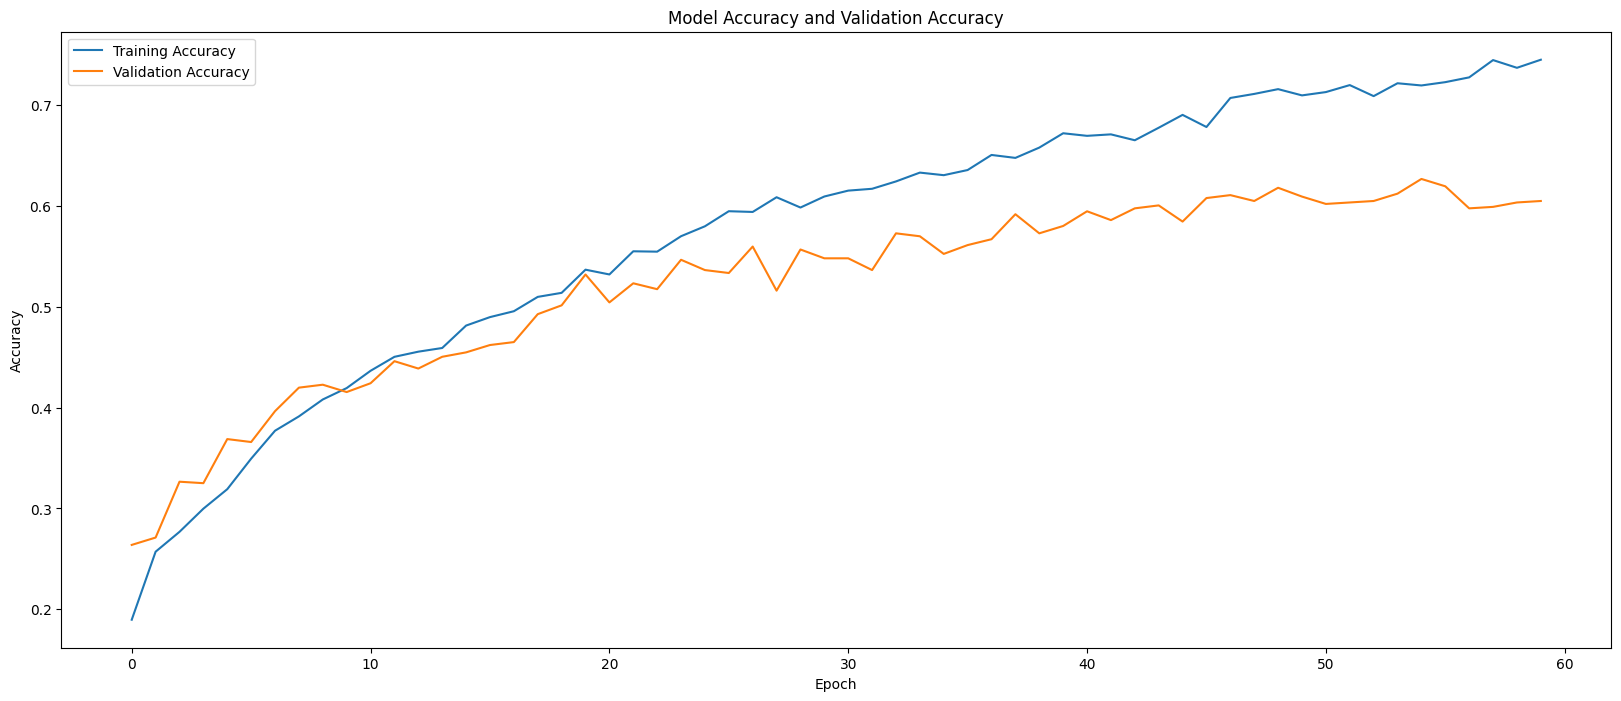

In [58]:

# Ploting accuracy and validation accuracy
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### SKLEARN MODEL

In [ ]:
# Train SKlean Model

x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

# Scikit learn model MLP
model=MLPClassifier(
    alpha=0.01, batch_size=8, epsilon=1e-08,random_state=1,
    hidden_layer_sizes=(120,100,80,50,30,20,), learning_rate='adaptive',
    max_iter=1500, verbose=0, n_iter_no_change=150
)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

ValueError: Found array with dim 4. MLPClassifier expected <= 2.

In [ ]:
# Tuning Hyperparametrs

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model=MLPClassifier(
    batch_size='auto', epsilon=1e-08,random_state=1,learning_rate='adaptive',
    max_iter=100, verbose=0, n_iter_no_change=10
)
parameters = dict(
    alpha=[0.01, 0.001], hidden_layer_sizes=[(120,50,30,), (120,100,)]
)
clf = GridSearchCV(model, parameters)
clf.fit(x_train,y_train)


sorted(clf.cv_results_.keys())

In [ ]:
clf.cv_results_

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
clf.best_estimator_

### Running Inference in Notebook


In [ ]:
from tensorflow.keras.models import load_model

# Defining paths for the inference file and model
infer_file_path='../input/Audio_Song_Actors_01-24/Actor_19/03-02-01-01-01-02-19.wav'
infer_model_path = '../output'
framework = 'keras'  # Can change to 'sklearn' if using sklearn
mode = 'infer'


def load_infer_data(filepath):
    '''
    Function to load the infernece data from filepath and extract the features the same way we did for training.
    '''
    file_name=os.path.basename(filepath)
    feature=np.array(extract_feature(filepath))
    print(feature.shape)

    # Printing the feature shape and reshaping it to a single row vector.
    return feature.reshape(1,-1)

In [ ]:
if framework == 'keras':
    model = load_model(infer_model_path + '/keras/keras_model.h5')
else:
    with open(infer_model_path + '/sklearn_model.pkl', 'rb') as f:
        model = pickle.load(f)

In [ ]:
model

In [ ]:
data_x = load_infer_data(infer_file_path)

In [ ]:
predicted_emotion = model.predict(data_x)

In [ ]:
predicted_emotion

In [ ]:
predicted_emotion_index = np.argmax(predicted_emotion)+1

In [ ]:
# Checking the predicted emotion
predicted_emotion_index

In [ ]:
# Printing the predicted emotion
print("Predicted Emotion: ", emotions_id['0'+str(predicted_emotion_index)])

In [ ]:
emotions_id

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'emotion_classifier.pkl')

### Running Inference through CLI

In [ ]:
!python engine.py --infer --infer-model-path ./model --infer-file-path '../input/Audio_Song_Actors_01-24/Actor_19/03-02-01-01-01-02-19.wav'
!python engine.py --train --framework keras